In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dta=sm.datasets.fair.load_pandas().data

In [3]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [4]:
#add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs >0).astype(int)

In [5]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [6]:
from patsy import dmatrices

In [7]:
y, x = dmatrices('affair ~ rate_marriage + age +yrs_married + children +  religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

x = x.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [8]:
x

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [9]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [10]:
df=pd.concat([x,y],axis=1)
df.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
affair           0
dtype: int64

In [11]:
df

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0,0.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0,0.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0,0.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0,0.0


### Data Exploration

In [12]:
df.groupby('affair').mean()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
affair,,,,,,,,,,,,,,,,,
0.0,1.0,0.140737,0.421516,0.313935,0.099930,0.015998,0.204498,0.073499,0.322513,0.272896,0.084628,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977
1.0,1.0,0.122747,0.470044,0.233804,0.150511,0.019484,0.207501,0.084267,0.311252,0.293229,0.080370,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236


#### Who have affair ,their rate_marraiage is low as expected

In [13]:
df.groupby('rate_marriage').mean()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,age,yrs_married,children,religious,educ,affair
rate_marriage,,,,,,,,,,,,,,,,,
1.0,1.0,0.242424,0.393939,0.262626,0.090909,0.010101,0.212121,0.070707,0.313131,0.323232,0.050505,33.823232,13.914141,2.308081,2.343434,13.848485,0.747475
2.0,1.0,0.143678,0.520115,0.206897,0.109195,0.017241,0.252874,0.094828,0.298851,0.298851,0.045977,30.471264,10.727011,1.735632,2.330460,13.864943,0.635057
3.0,1.0,0.135952,0.473313,0.241692,0.124874,0.019134,0.236657,0.082578,0.318228,0.254783,0.084592,30.008056,10.239174,1.638469,2.308157,14.001007,0.550856
4.0,1.0,0.129349,0.446030,0.286351,0.118198,0.013381,0.197591,0.081178,0.325602,0.280553,0.075379,28.856601,8.816905,1.369536,2.400981,14.144514,0.322926
5.0,1.0,0.134128,0.407228,0.318182,0.113264,0.019747,0.194113,0.069300,0.316319,0.283532,0.095380,28.574702,8.311662,1.252794,2.506334,14.399776,0.181446


#####  An increase in age, yrs_married, and children appears to correlate with a declining marriage rating.

###  Data Visualisation

Text(0, 0.5, 'Frequency')

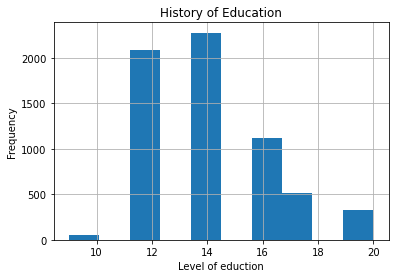

In [14]:
df.educ.hist()
plt.title('History of Education')
plt.xlabel('Level of eduction')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

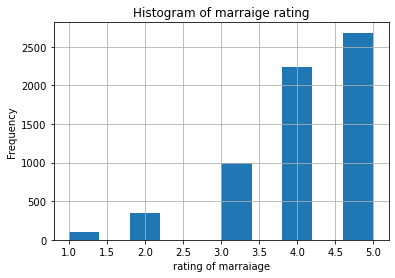

In [15]:
df.rate_marriage.hist()
plt.title('Histogram of marraige rating')
plt.xlabel('rating of marraiage')
plt.ylabel('Frequency')

##### visualaising rating of marraiage and affairs

Text(0, 0.5, 'Frequency')

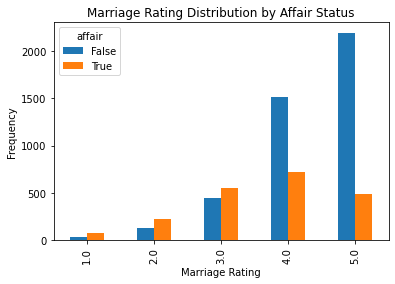

In [16]:
pd.crosstab(df.rate_marriage,df.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

#####  Let's use a stacked barplot to look at the percentage of women having affairs by number of years of marriage.

<AxesSubplot:xlabel='yrs_married'>

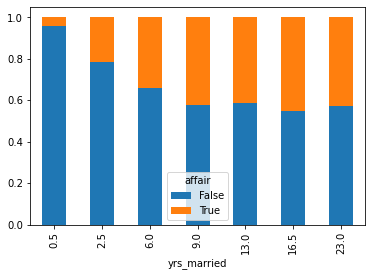

In [17]:
affairs_yr_married=pd.crosstab(df.yrs_married,df.affair.astype(bool))
affairs_yr_married.div(affairs_yr_married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

### Preaparing Data for Logistic Regression

In [18]:
x=df.drop(columns=['affair'])
y=df['affair']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.fit_transform(x_test)
from sklearn.linear_model import LogisticRegression
model_logistic=LogisticRegression()
model_logistic.fit(x_train_scaled,y_train)



LogisticRegression()

In [19]:
model_logistic.score(x_train_scaled,y_train)

0.7237432675044884

In [20]:
model_logistic.score(x_test_scaled,y_test)

0.731413612565445

In [21]:
x_test_scaled[0]

array([ 0.00000000e+00, -3.90750018e-01,  1.12983170e+00, -6.24581374e-01,
       -3.69091365e-01, -1.44376134e-01, -5.21188849e-01, -2.98227374e-01,
       -6.83354876e-01,  1.64801496e+00, -2.97185276e-01, -1.13189472e+00,
       -2.93139371e-01,  1.27276614e-03,  4.19967753e-01, -1.64925626e+00,
       -7.56686504e-02])

In [22]:
model_logistic.predict([x_test_scaled[0]])

array([1.])

In [25]:
y_pred=model_logistic.predict(x_test_scaled)

### Evaluation Matrices

In [35]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score
from sklearn import metrics

In [26]:
confusion_matrix(y_test,y_pred)

array([[1171,  132],
       [ 381,  226]], dtype=int64)

In [33]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result

In [34]:
model_eval(y_test,y_pred)

{'Accuracy': 0.731413612565445,
 'Precision': 0.6312849162011173,
 'Recall': 0.3723228995057661,
 'Specficity': 0.898695318495779,
 'F1': 0.4683937823834197}

In [36]:
metrics.confusion_matrix(y_test,y_pred)

array([[1171,  132],
       [ 381,  226]], dtype=int64)

### Model evaluation using Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score

In [43]:
cross_val_score(LogisticRegression(),x_train_scaled,y_train,scoring='accuracy',cv=10)

array([0.76233184, 0.72421525, 0.7264574 , 0.70627803, 0.68609865,
       0.72869955, 0.74382022, 0.70786517, 0.72134831, 0.71235955])

### Looks good. It's still performing at 73% accuracy.

In [45]:
import pickle
filename='logistic_regg_model'
pickle.dump(model_logistic,open(filename,'wb'))


In [47]:
loded_model=pickle.load(open(filename,'rb'))

In [54]:
df.tail(1)

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
6365,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,22.0,2.5,0.0,2.0,16.0,0.0


In [55]:
loded_model.predict([[1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,22.0,2.5,0.0,2.0,16.0]])

array([0.])